##### THE SPARKS FOUNDATION May'21

### Task 4 - Exploratory Data Analysis - Sports

#### Author: Tushar Suresh Patil

####  Aim :-

● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors
contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.



#### Importing libraries

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import cufflinks as cf

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# For offline use
cf.go_offline()

####  Loading Dataset 1

In [3]:
df1= pd.read_csv('deliveries.csv',encoding='latin1')

In [4]:
df1.shape

(179078, 21)

In [5]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Loading Dataset 2

In [6]:
df2 = pd.read_csv('matches.csv')

In [7]:
df2.shape

(756, 18)

In [8]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
df2.head(2).T

,0,1
id,1,2
season,2017,2017
city,Hyderabad,Pune
date,2017-04-05,2017-04-06
team1,Sunrisers Hyderabad,Mumbai Indians
team2,Royal Challengers Bangalore,Rising Pune Supergiant
toss_winner,Royal Challengers Bangalore,Rising Pune Supergiant
toss_decision,field,field
result,normal,normal
dl_applied,0,0


### 1.Data Cleaning 

In [10]:
df2['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [11]:
df2['team2'].value_counts()

Kolkata Knight Riders          95
Royal Challengers Bangalore    95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

In [12]:
df2['venue'].value_counts()[:15]

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Name: venue, dtype: int64

There have been multiple names for the Same Team- the Data is cleaned in the following portion.

In [13]:
df2['team1'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df2['team2'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df2['winner'].replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)

In [14]:
df2['venue'].replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

In [15]:
df2.team2.value_counts().shape

(14,)

#### 1.Top 15 Venues where the most number of matches have been played

In [16]:
venue = df2['venue'].value_counts()[:15].reset_index()

In [17]:
venue.iplot(kind='bar', x='index', y = 'venue',color = 'green',title='Top 15 Venues where the most number of matches have been played',
                            xTitle='Venue', yTitle='Number of Matches')
# sns.barplot(x=df2.venue.value_counts()[:15].index,y=df2.venue.value_counts()[:15].values)
# plt.show()

#### 2.Top 15 Cities where the most number of matches have been played

In [18]:
Top_cities = df2.city.value_counts()[:15].reset_index()

In [19]:
Top_cities.iplot(x='index',y='city', kind='bar', xTitle='City', yTitle='Number of Matches',
                title='Top 15 Cities where the most number of matches have been played', color='blue')


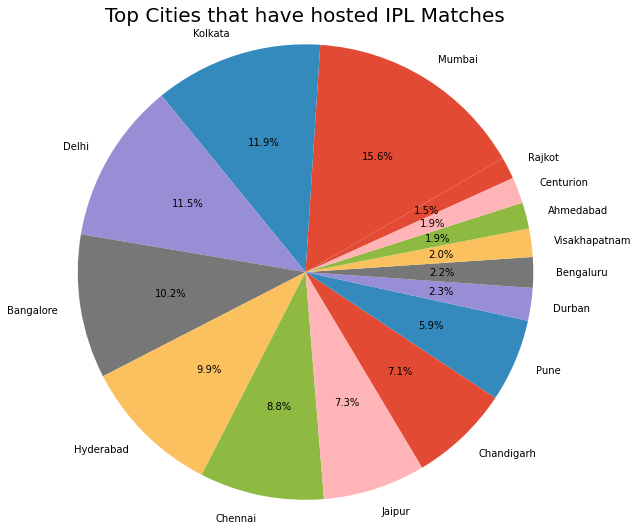

In [20]:
plt.figure(figsize=(9,9))
plt.pie(Top_cities['city'],labels=Top_cities['index'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top Cities that have hosted IPL Matches',size=20)
plt.show()

#### 3.Numbers of matches won by team

In [21]:
most_won = df2.winner.value_counts().reset_index()

In [56]:
most_won.iplot(kind='bar',x='index', y='winner',
              color='tomato',xTitle='Team',yTitle= 'Number of matches', title='Numbers of matches won by team')

#### 4.Team winning the toss and going for the win

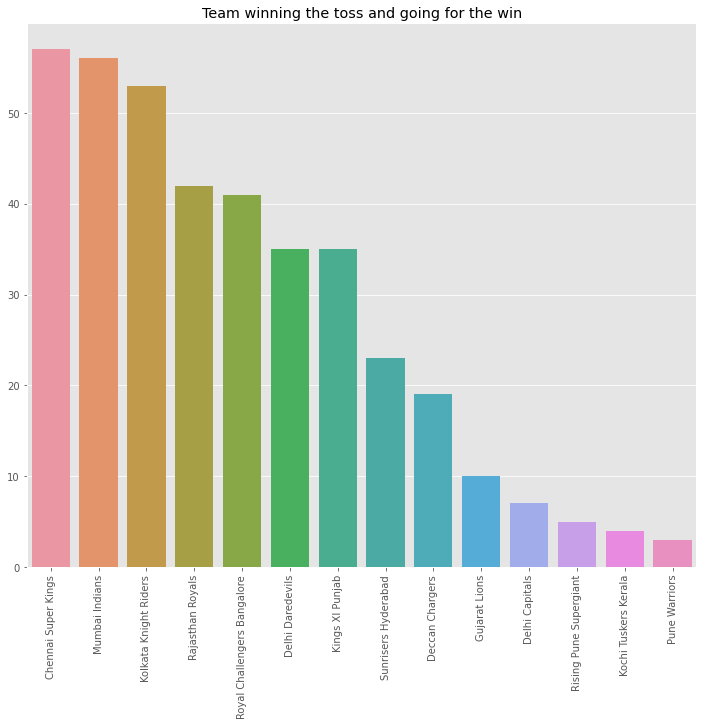

In [23]:
toss_and_match = df2[df2['toss_winner']==df2['winner']]
plt.figure(figsize=(12,10))
plt.xticks(rotation =90)
plt.title('Team winning the toss and going for the win')
sns.barplot(x=toss_and_match.winner.value_counts().index, y = toss_and_match.winner.value_counts().values)
plt.show()

#### Team who has been won the Toss and Match  (Toss Decisions taken)

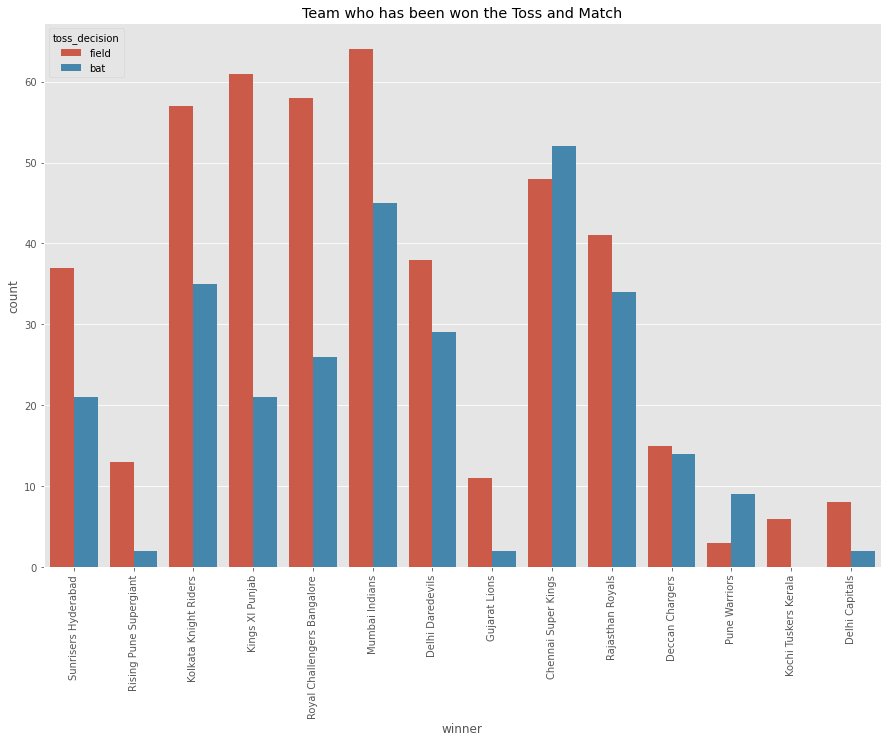

In [57]:
plt.figure(figsize=(15,10))
plt.title('Team who has been won the Toss and Match')
plt.xticks(rotation =90)
sns.countplot(df2['winner'],hue=df2['toss_decision'])
plt.show()

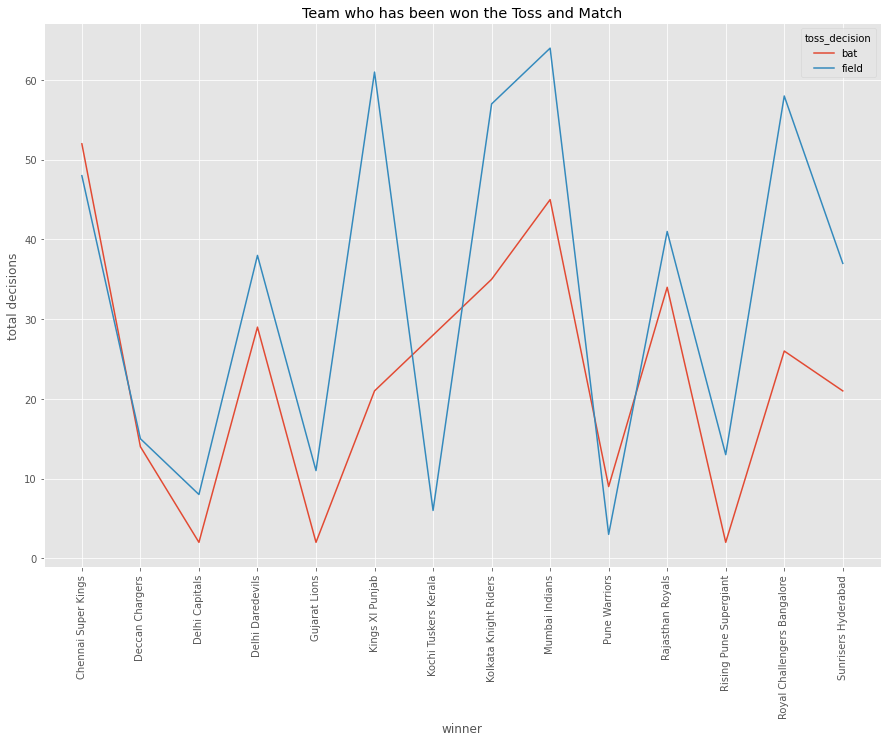

In [58]:
toss_decision = df2.groupby(['winner','toss_decision']).size().reset_index(name='total decisions')
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90)
plt.title('Team who has been won the Toss and Match')
sns.lineplot(x='winner',y='total decisions', hue='toss_decision', data = toss_decision)
plt.show()

In [26]:
toss_winner = df2.toss_winner.value_counts().reset_index()
toss_winner = toss_winner.rename(columns = {'index':'Team','toss_winner':'Won Toss '})

In [27]:
match_winner = df2.winner.value_counts().reset_index()
match_winner = match_winner.rename(columns = {'index':'Team','winner':'Won Match'})

In [28]:
match_winner.drop('Team',axis =1, inplace =True)

In [29]:
combine_win = pd.concat([toss_winner,match_winner],axis =1)

#### Winning Rate According to Toss for Each Team

In [30]:
combine_win.iplot(x= 'Team',title='Winning Rate According to Toss for Each Team',size = 10)
# plt.xticks(rotation = 45)

#### 5.Creating the list of Top 10 Scoring Batsmans with Strike Rate

In [31]:
top_scorer=df1.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).reset_index()
balls_faced = df1.groupby('batsman').count()['ball'].sort_values(ascending = False).reset_index()

In [32]:
strike_rate= pd.merge(top_scorer,balls_faced,how='inner',left_on=['batsman'],right_on=['batsman'])

In [33]:
strike_rate.head()

,batsman,batsman_runs,ball
0,V Kohli,5434,4211
1,SK Raina,5415,4044
2,RG Sharma,4914,3816
3,DA Warner,4741,3398
4,S Dhawan,4632,3776


In [34]:
strike_rate['Strike Rate'] = strike_rate.batsman_runs/ strike_rate.ball *100 

In [35]:
strike_rate[:10].iplot(kind='scatter',x='batsman',y='batsman_runs',title='Top 10 Scoring Batsmans',
                       mode='markers',size=10,xTitle='Batsman Name',yTitle='Total Runs')

In [36]:
# plt.figure(figsize=(12,10))
# sns.scatterplot(x='batsman', y ='ball', data = strike_rate[:10], hue ='Strike Rate',alpha =1 )

In [37]:

strike_rate[:10][['batsman','batsman_runs','ball']].iplot(x='batsman',title='Top 10 Scoring Batsmans with balls they have faced')

#### 6.Batsman with best Strike Rate (batsman has scored a minimum of 500 runs)

In [38]:
batsman_with_500 = strike_rate[strike_rate['batsman_runs']>500]
best_striker= batsman_with_500.sort_values(by='Strike Rate', ascending = False)

In [39]:
best_striker[:10][['batsman','batsman_runs','Strike Rate']]

,batsman,batsman_runs,Strike Rate
48,AD Russell,1445,179.950187
81,SP Narine,803,166.943867
37,RR Pant,1792,162.318841
51,GJ Maxwell,1403,155.543237
103,CH Morris,520,153.392330
61,HH Pandya,1118,151.902174
50,JC Buttler,1431,150.000000
20,V Sehwag,2728,148.827059
8,AB de Villiers,4428,148.740343
5,CH Gayle,4560,145.640370


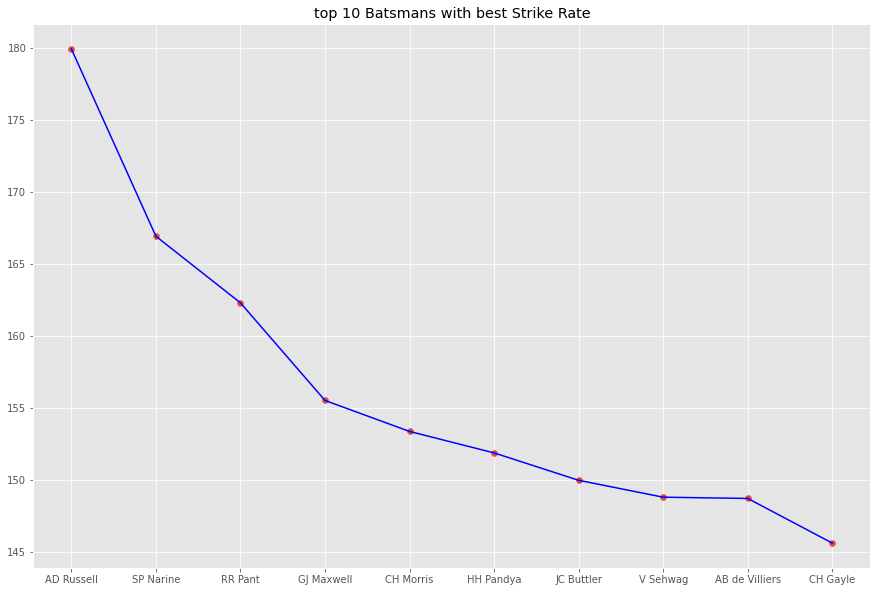

In [59]:
plt.figure(figsize=(15,10))
plt.title('top 10 Batsmans with best Strike Rate')
plt.plot(best_striker['batsman'][:10],best_striker['Strike Rate'][:10],color='b')
plt.scatter(best_striker['batsman'][:10],best_striker['Strike Rate'][:10])
plt.show()

In [41]:
strike_rate.iplot(kind='scatter',x='batsman_runs',y='Strike Rate',mode='markers',size=10,xTitle='Total runs',yTitle='Strike Rate',title='Overall Runs vs Strike Rate Analysis', color='green')

#### 7.Top 10 Economy Bowlers

In [42]:
bolwers_runs = df1.groupby('bowler').sum()['total_runs'].sort_values(ascending = False).reset_index() 

In [43]:
total_ball = df1.groupby('bowler').count()['ball'].sort_values(ascending = False).reset_index()

In [44]:
economy_bowler = pd.merge(total_ball,bolwers_runs,how='inner',left_on=['bowler'],right_on=['bowler'])

In [45]:
economy_bowler['Economy']=economy_bowler.total_runs / economy_bowler.ball * 6

In [46]:
economy_bowler.head()

,bowler,ball,total_runs,Economy
0,Harbhajan Singh,3451,4050,7.041437
1,A Mishra,3172,3850,7.282472
2,PP Chawla,3157,4153,7.892936
3,R Ashwin,3016,3391,6.746021
4,SL Malinga,2974,3511,7.083389


In [47]:
economy_bowler.iplot(kind='scatter',x='ball',y='Economy',mode='markers',size=10, colors='blue',xTitle='Bowl Bowled',yTitle='Economy',title='Economy rate of Bowlers')

#### 8.Top 10 Economy Bowlers (bowler has atleast bowled 1000 deliveries )

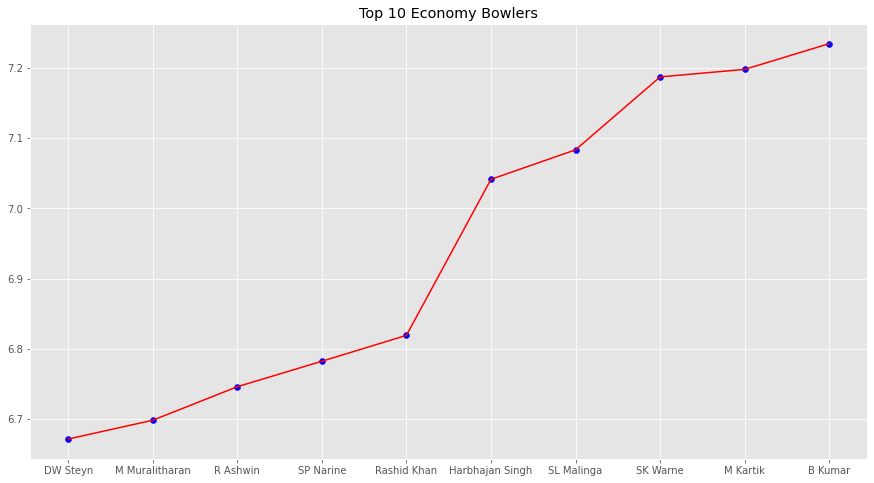

In [48]:
plt.figure(figsize=(15,8))
plt.title('Top 10 Economy Bowlers')
plt.plot('bowler', 'Economy', data = economy_bowler[economy_bowler['ball']>1000].sort_values(by='Economy')[:10], c='r')

plt.scatter(x = 'bowler', y='Economy', data = economy_bowler[economy_bowler['ball']>1000].sort_values(by='Economy')[:10],c='b')
plt.show()

#### list of the Players who have achieved highest number of 'Man of the Match Awards'

In [49]:
player_of_match= df2.groupby('player_of_match').size().sort_values(ascending = False).reset_index(name='Man of the Match Awards')

In [50]:
player_of_match[:15].iplot(kind = 'bar',x='player_of_match', y='Man of the Match Awards',color = 'green')

#### Teams Who has been won the match with maximum runs

In [51]:
df2['win_by_runs'].max()

146

In [52]:
df2[df2['win_by_runs']>100].sort_values('win_by_runs',ascending=False)[['winner','win_by_runs']]

,winner,win_by_runs
43,Mumbai Indians,146
619,Royal Challengers Bangalore,144
59,Kolkata Knight Riders,140
556,Royal Challengers Bangalore,138
410,Royal Challengers Bangalore,130
706,Sunrisers Hyderabad,118
295,Kings XI Punjab,111
114,Rajasthan Royals,105
676,Mumbai Indians,102


#### The Toss Decisions taken by Venue

In [53]:
Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=df2[df2.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]

In [54]:
venue_decision = teams_filter.groupby(['venue', 'toss_decision']).size().reset_index(name = 'num_of_decision')

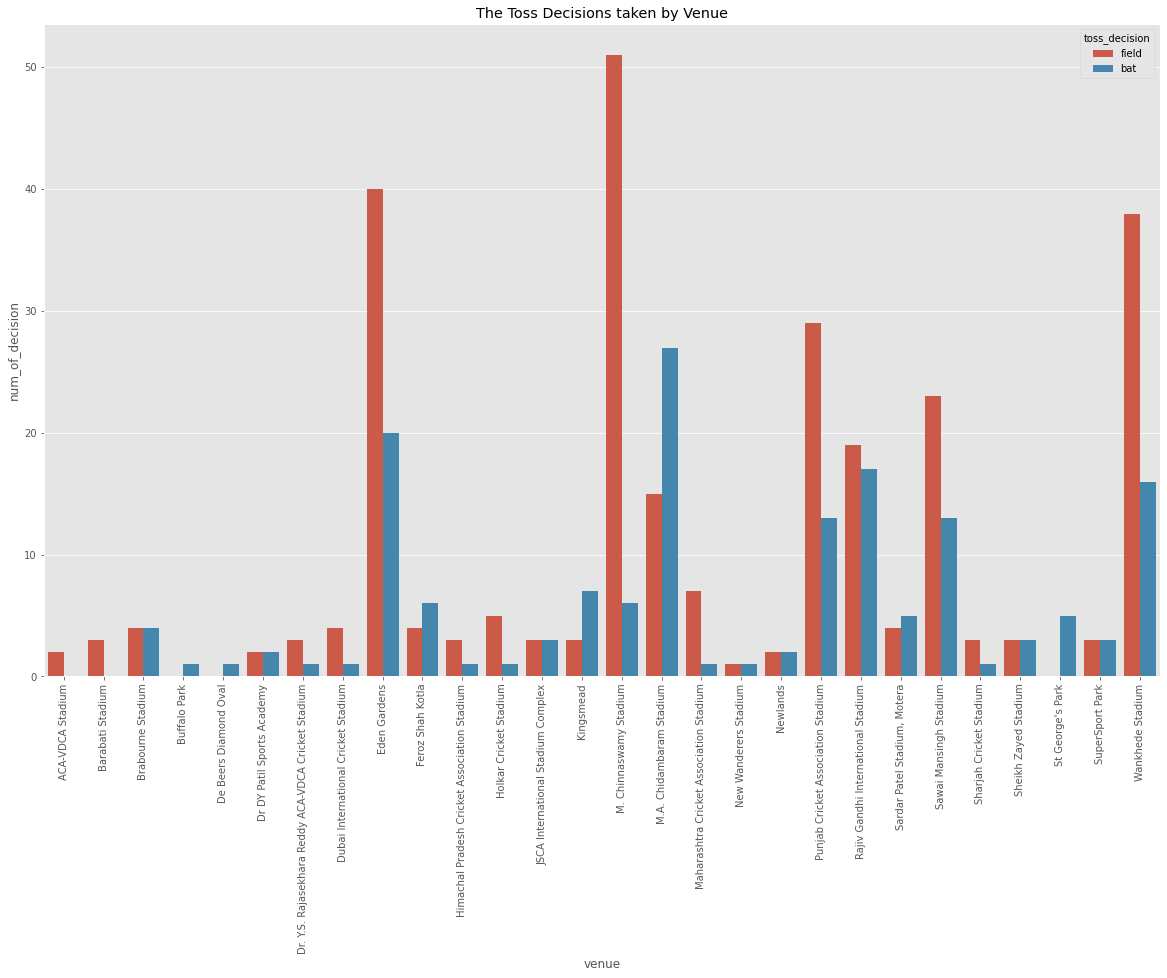

In [55]:
plt.figure(figsize=(20,12))
plt.xticks(rotation = 90)
plt.title('The Toss Decisions taken by Venue')
sns.barplot(x='venue', y='num_of_decision', data =venue_decision , hue ='toss_decision',alpha=1)
plt.show()

### Observations

#### 1.Top Venues where the most number of matches have been played:
       1)M. Chinnaswamy Stadium - 80
       2)Eden Garden - 77
       3)Feroz Shah Kotla - 74
       
#### 2.Top Cities where the most number of matches have been played:
       1)Mumbai - 101
       2)Kolkata - 77
       3)Delhi - 74
       
#### 3.Numbers of matches won by team:
       1)Mumbai Indians - 109
       2)Chennai Super Kings - 100
       3)Kolkata Knight Riders - 92
       
#### 4. Top Scoring Batsmans
       1)V Kohli  5434  
       2)SK Raina  5415
       3)RG Sharma  4914

#### 4. Batsman with best Strike Rate
       1)AD Russell 179
       2)SP Narine  166
       3)RR Pant  162

#### 5. Top 3 Economy Bowlers
       1)Harbhajan Singh - 7.04
       2)A Mishra  166  - 7.28
       3)PP Chawla  162  - 7.89
       
#### 7.Players who have achieved highest number of 'Man of the Match Awards'
       1)CH Gayle	 - 21
       2)AB de Villiers - 20
       3)MS Dhoni - 17
 
#### 8.Teams Who has been won the match with maximum runs--
       1) Mumbain Indians (by 140 runs)